In [7]:
import numpy as np
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.linear_model import Lasso
from sklearn.metrics import root_mean_squared_error as rmse
import matplotlib.pyplot as plt
from data_generator import postfix, liftDataset

In [8]:
# Number of samples
N = 1000

# Noise variance 
sigma = 0.01

# Feature dimension
d = 40

psfx = postfix(N,d,sigma) 

In [9]:
unliftX = np.load("X"+psfx+".npy")
y = np.load("y"+psfx+".npy")

print("Dataset has n=%d samples, each with d=%d features," % unliftX.shape,"as well as %d labels." % y.shape[0])
X = np.array(liftDataset(unliftX))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print("Randomly split dataset to %d training and %d test samples" % (X_train.shape[0],X_test.shape[0]))

Dataset has n=1000 samples, each with d=40 features, as well as 1000 labels.
Randomly split dataset to 700 training and 300 test samples


In [14]:
alpha_val = np.linspace(2**-10, 2**10, 1000)
mean_rmse_vals = []
stdev_rmse_vals = []

In [15]:
for alpha in alpha_val:
    model = Lasso(alpha = alpha)
    cv = KFold(
        n_splits=5, 
        random_state=42,
        shuffle=True
        )
    scores = cross_val_score(
        model, X_train, y_train, cv=cv,scoring="neg_root_mean_squared_error")
    mean_rmse_vals.append(np.mean(scores))
    stdev_rmse_vals.append(np.std(scores))

In [28]:
max_rmse_index = np.argmax(mean_rmse_vals)     # we are finding the max of negative RMSE value, which indicates better performance
optimum_rmse = mean_rmse_vals[max_rmse_index]
optimal_alpha = alpha_val[max_rmse_index]
print("Highest Negative RMSE:",optimum_rmse)
print("Optimal Alpha:",optimal_alpha)

Highest Negative RMSE: -0.010260296890806136
Optimal Alpha: 0.0009765625
1000


In [17]:
model = Lasso(alpha = optimal_alpha)

cv = KFold(
        n_splits=5, 
        random_state=42,
        shuffle=True
        )

type(cv)

sklearn.model_selection._split.KFold

In [21]:
scores = cross_val_score(
        model, X_train, y_train, cv=cv,scoring="neg_root_mean_squared_error")


print("Cross-validation RMSE for α=%f : %f ± %f" % (optimal_alpha,-np.mean(scores),np.std(scores)) )

Cross-validation RMSE for α=0.000977 : 0.010260 ± 0.000621


In [19]:
print("Fitting linear model over entire training set...",end="")
model.fit(X_train, y_train)
print(" done")

Fitting linear model over entire training set... done


In [33]:
# Compute RMSE
rmse_train = rmse(y_train,model.predict(X_train))
rmse_test = rmse(y_test,model.predict(X_test))

print("Train RMSE = %f, Test RMSE = %f" % (rmse_train,rmse_test))

Train RMSE = 0.009984, Test RMSE = 0.010189


0.001

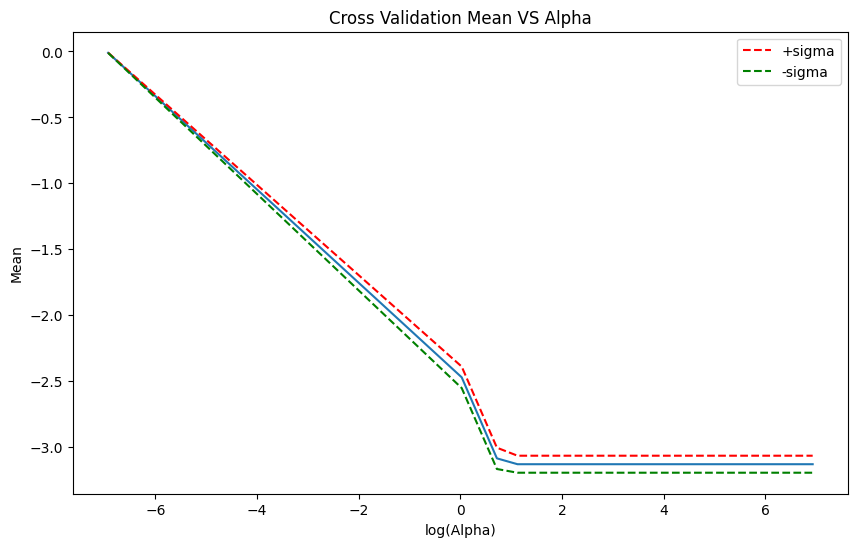

In [29]:
posStdev = [elem1 + elem2 for elem1, elem2 in zip(mean_rmse_vals, stdev_rmse_vals)]
negStdev = [elem1 - elem2 for elem1, elem2 in zip(mean_rmse_vals, stdev_rmse_vals)]
# Plotting Predictive Performance VS Alpha
plt.figure(figsize=(10, 6))
plt.plot(np.log(alpha_val), mean_rmse_vals)
plt.plot(np.log(alpha_val), posStdev, label='+sigma', linestyle='--', color='red')
plt.plot(np.log(alpha_val), negStdev, label='-sigma', linestyle='--', color='green')
# plt.fill_between(dates[window_size - 1:], upper_band, lower_band, color='lightgray', alpha=0.4, label='Bollinger Bands')
plt.title('Cross Validation Mean VS Alpha')
plt.xlabel('log(Alpha)')
plt.ylabel('Mean')
plt.legend()
plt.show()

In [37]:
selectedCoeffs = model.coef_[np.abs(model.coef_) > 1e-3]

print("Coefficients: ")
for val in selectedCoeffs:
    print(val)

print()
print("Intercept: ", model.intercept_)

Coefficients: 
1.9991160720341472
-1.0995256959151836
0.698655760624995
1.1992428103109434
0.3998317844798629
-1.4993559738033488
-0.6989529160789162

Intercept:  1.2988958548099105
